
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Time_Series/blob/main/W10/W10P2.ipynb)




In [ ]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels
import scipy

In [ ]:
def download_data():  ### This dude will download the dataset from the directory directly!
  import requests
  url = "https://raw.githubusercontent.com/y-akbal/Tedu_Time_Series/main/W10/USDTRY=X.csv"
  res = requests.get(url, allow_redirects=True)
  with open('USDTRY=X.csv','wb') as file:
    file.write(res.content)

download_data()

In [ ]:
data = pd.read_csv("USDTRY=X.csv")["Close"]

In [ ]:
pd.read_csv("USDTRY=X.csv")

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-28,2.914690,2.923560,2.904910,2.915370,2.915370,0.0
1,2015-12-29,2.905350,2.914500,2.902200,2.905400,2.905400,0.0
2,2015-12-30,2.906300,2.921310,2.904200,2.904800,2.904800,0.0
3,2015-12-31,2.920100,2.929770,2.906000,2.920090,2.920090,0.0
4,2016-01-01,2.911900,2.911900,2.911900,2.911900,2.911900,0.0
...,...,...,...,...,...,...,...
1801,2022-11-22,18.600599,18.639500,18.586670,18.600599,18.600599,0.0
1802,2022-11-23,18.612101,18.630770,18.594851,18.612101,18.612101,0.0
1803,2022-11-24,18.608999,18.631001,18.596430,18.608999,18.608999,0.0
1804,2022-11-25,18.626801,18.635481,18.594130,18.626801,18.626801,0.0


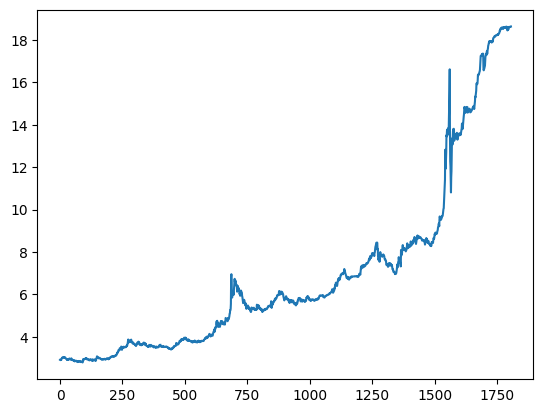

In [ ]:
plt.plot(data)

In [ ]:
data = data.interpolate()

In [ ]:
log_ = lambda x: np.log(x+1)

In [ ]:
data = data.apply(log_)

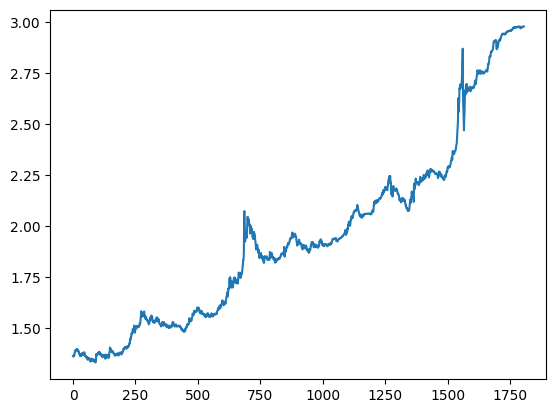

In [ ]:
plt.plot(data)

In [ ]:
data

0       1.364910
1       1.362360
2       1.362207
3       1.366115
4       1.364023
          ...   
1801    2.975560
1802    2.976147
1803    2.975989
1804    2.976896
1805    2.977012
Name: Close, Length: 1806, dtype: float64

In [1]:
from statsmodels.tsa.stattools import adfuller
adfuller(data)

NameError: name 'data' is not defined

In [ ]:
data_ = data.diff()[1:]

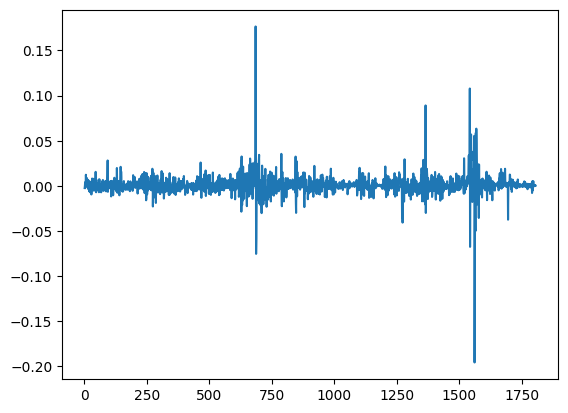

In [ ]:
plt.plot(data_)

In [ ]:
from statsmodels.tsa.stattools import arma_order_select_ic

In [ ]:
arma_order_select_ic(data_, max_ar = 4, max_ma = 4)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
mod = ARIMA(data, order = (2,1,2))
model = mod.fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1806
Model:                 ARIMA(2, 1, 2)   Log Likelihood                5503.713
Date:                Mon, 06 May 2024   AIC                         -10997.426
Time:                        16:00:33   BIC                         -10969.934
Sample:                             0   HQIC                        -10987.279
                               - 1806                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7288      0.075      9.753      0.000       0.582       0.875
ar.L2          0.2567      0.064      3.980      0.000       0.130       0.383
ma.L1         -0.5957      0.075     -7.955      0.000      -0.742      -0.449
ma.L2         -0.3823      0.063     -6.104      0.000      -0.505      -0.260
sigma2         0.0001   7.78e-07    168.954      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):            633851.50
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               6.08   Skew:                            -0.77
Prob(H) (two-sided):                  0.00   Kurtosis:                        94.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

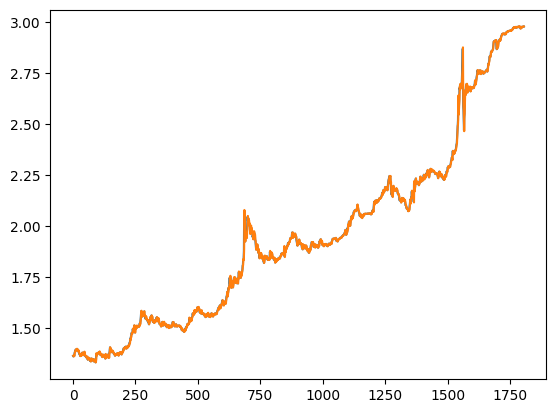

In [ ]:
plt.plot(data)
plt.plot(model.predict()[1:])

In [ ]:
residuals = model.resid

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

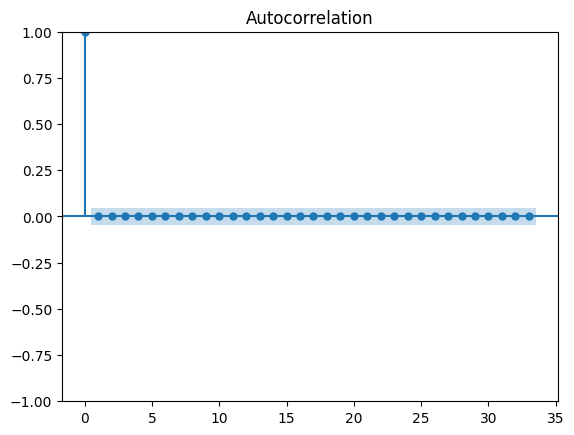

In [ ]:
plot_acf(np.square(residuals));

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [ ]:
acorr_ljungbox(residuals, model_df = 4, return_df = True)

,lb_stat,lb_pvalue
1,0.011055,NaN
2,0.022287,NaN
3,0.040993,NaN
4,0.086283,NaN
5,0.115820,0.733614
6,0.184191,0.912018
7,0.185537,0.979890
8,0.207488,0.994977
9,0.255330,0.998400
10,0.272017,0.999621


In [ ]:
acorr_ljungbox(np.square(residuals), model_df = 4, return_df = True)

,lb_stat,lb_pvalue
1,0.000005,NaN
2,0.000005,NaN
3,0.000005,NaN
4,0.000005,NaN
5,0.000006,0.998129
6,0.000006,0.999997
7,0.000006,1.000000
8,0.000010,1.000000
9,0.000016,1.000000
10,0.000017,1.000000


In [ ]:
statsmodels.stats.diagnostic.het_arch(residuals, nlags = 12) ####There is a little ARCH effect here!

(69.02867274737872,
 4.865035781256328e-10,
 5.93923235228927,
 3.098355936237841e-10)